# Xenopict Quickstart

Xenopict is a python library for depicting molecules.


## Reading in a Molecule

The main entrypoint to xenopict is the Xenopict class, which is initialized with a small molecule. The class can take a SMILES String

In [1]:
from xenopict import Xenopict     # the magic import loads integrations with pandas
mol = Xenopict('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

It can also be initialized with a RDKit mol.

In [2]:
from rdkit import Chem
mol = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
diclofenac = mol = Xenopict(mol)

Now that a molecule is loaded, we can display it easily in pandas, by loading the magic package.

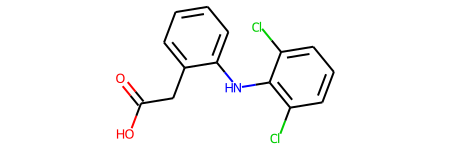

In [3]:
from xenopict import Xenopict, magic
mol

## Atom and Bond Shading

Xenopict can shade molecules by with an intensity, which can range from -1 to 1. This shading is percepually uniform, implemented in concise vector graphics. Xenosite produces an SVG, which can be accessed with the 'to_svg' method.

To demonstrate, we will shade a molecule by its partial charge, which we compute from the RDKit library. Each atom is assigned a number in a vector.

In [4]:
import rdkit.Chem.rdPartialCharges
import numpy as np
rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol.mol)
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()  # partial charge (scaled to [-1, 1])
shading

array([-0.52409679,  0.63909631, -1.        ,  0.15070901, -0.0277732 ,
       -0.11722158, -0.12854194, -0.12512175, -0.07965959,  0.08793757,
       -0.73360109,  0.15852838,  0.13636156, -0.17049353, -0.08585118,
       -0.12297688, -0.08585118,  0.13636156, -0.17049353])

The shading is applied to molecule using the "shade" method. The "halo" method adds a halo effect that aids visibility. 

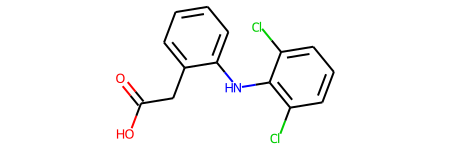

In [5]:
Xenopict(mol).shade(shading).halo()


We can shade molecules by bond too. To demonstrate, we will create a shading vector for bonds that is the average charge of the atom at each end.

In [6]:
a1 = [b.GetBeginAtomIdx() for b in mol.GetBonds()]
a2 = [b.GetEndAtomIdx() for b in mol.GetBonds()]
bshading = (shading[a1] + shading[a2])  / 2
bshading

array([ 0.05749976, -0.18045184,  0.39490266,  0.0614679 , -0.07249739,
       -0.12288176, -0.12683184, -0.10239067,  0.00413899, -0.32283176,
       -0.28753636,  0.14744497, -0.01706598,  0.02525519, -0.10441403,
       -0.10441403,  0.02525519, -0.01706598,  0.03008218,  0.14744497])

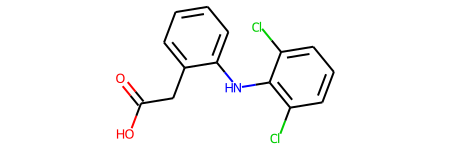

In [7]:
Xenopict(mol).shade(bond_shading=(a1, a2, bshading)).halo()

Atoms and bonds can be shaded together at the same time.

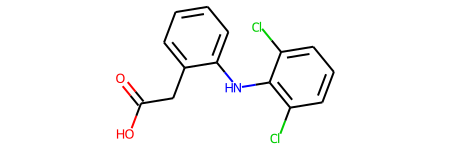

In [8]:
x = Xenopict(mol).shade(shading, bond_shading=(a1, a2, bshading)).halo()
x

## Marking, Shading and Focusing Substructures

At times we want to mark a substructure. We can do so by supplying a list of atom idxs.

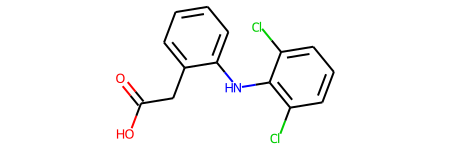

In [9]:
x.mark_substructure([0,1,2,3])

We can also shade substructures, by specifying them as lists of IDs, wiht a list of shading values. Substructures with intensities closer to zero are painted behind those with higher intensities. 

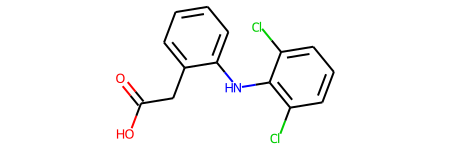

In [10]:
substr1 = [0,1,2,3]
substr2 = [7,8,9,10]
substr3 = [3,4,5,9]

shading = [1, -0.65, 0.6]

Xenopict(mol).shade_substructure([substr1, substr2, substr3], shading)



By default, xenopict adds in all the bonds joining a group of atoms. But sometimes this includes
bonds that were not wanted. Substructures can be more precisely specified by including a list of bonds. 

In [11]:
mol = Chem.MolFromSmiles("c1ccccc1CCC")

atoms = [0,1,2,3,4,5]
bonds = [[0,1], [2,1], [2,3], [3,4],[4, 5], [5,6]]

Xenopict(mol).shade_substructure([atoms], [-0.8]), \
Xenopict(mol).shade_substructure([atoms], [0.8], [bonds])


(<xenopict.drawer.Xenopict at 0x119e2f340>,
 <xenopict.drawer.Xenopict at 0x11a68a280>)

Alongside shadings or alternately to them, we can also depict a substructure in isolation.

In [12]:
Xenopict(mol).substructure_focus(atoms), \
Xenopict(mol).substructure_focus(atoms, bonds)

(<xenopict.drawer.Xenopict at 0x119e2f8e0>,
 <xenopict.drawer.Xenopict at 0x119e2fb80>)

# Adding Atom Indices

Molecules can be drawn with indices too.

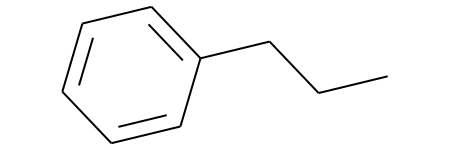

In [13]:
x = Xenopict(mol,scale=30,  add_atom_indices=True)
x


Atom IDs are carried over to substructure depictions, but they are not filtered out yet.

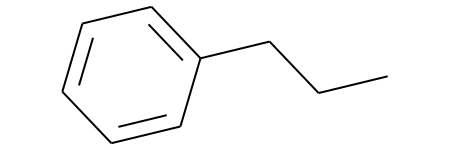

In [14]:
x.substructure_focus([4,5,6])